Bushra Hoteit

**1. Text Data Preparation**

***Load the Newsgroups dataset using scikit-learn.***

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups_data.data
labels = newsgroups_data.target


print(f"\nLoaded {len(texts)} documents.")
print(f"\nSample text:{texts[0][:500]}")


Loaded 18846 documents.

Sample text:

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a


***Perform basic text preprocessing including tokenization, removing stopwords, and punctuation.***

In [4]:
stop_words = set(stopwords.words('english'))
punct_table = str.maketrans('', '', string.punctuation)

def preprocess(text):
  text = text.lower()                   # Lowercase
  text = text.translate(punct_table)    # Remove punctuation
  tokens = text.split()                 # Tokenize    Didnt work with --> word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
  return ' '.join(tokens)

texts_cleaned= [preprocess(doc) for doc in texts]     # Apply the function to each document in the texts list
print("Preprocessing complete")
print(f"Example cleaned text:", texts_cleaned[0][:500])

Preprocessing complete
Example cleaned text: sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually bit puzzled bit relieved however going put end nonpittsburghers relief bit praise pens man killing devils worse thought jagr showed much better regular season stats also lot fo fun watch playoffs bowman let jagr lot fun next couple games since pens going beat pulp jersey anyway disappointed see islanders lose final regular season game pens rule


**2. Text Representation**

***Implement Bag of Words and TF-IDF for feature extraction.***

In [5]:
# Bag of Words
# Converts text to sparse matrix of word counts for ML models.

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Vectorizer with Parameters
bow_vectorizer = CountVectorizer(max_features=1000, max_df=0.5, min_df=10)         # Keeping only the top 1000 most frquent tokens / ignore tokens that appear in more than 50% of docs & in less than 10 documents
X_bow = bow_vectorizer.fit_transform(texts_cleaned)

print("Bag of Words shape:", X_bow.shape)


Bag of Words shape: (18846, 1000)


In [6]:
# Using td-idf to transform the counts to weighted td-idf scores.
# Highlights important words while down weighting very common ones.

tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.5, min_df=10)
X_tfidf = tfidf_vectorizer.fit_transform(texts_cleaned)

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (18846, 1000)


***Introduce basic word embeddings and illustrate with a simple pre-trained example, if feasible.***

In [7]:
!pip install gensim

import gensim.downloader as api

# Word embeddings are vector representations of words in a continuous space, where words with similar meanings are close together.
# This helps models understand relationships between words beyond just counting their occurrences.

In [8]:
# Load pre-trained word vectors using GloVe model
model = api.load('glove-wiki-gigaword-50')

# Embedding vector for the word 'computer'
computer_vector = model['computer']

# Calculating similarity between 'computer' and 'technology'
similarity = model.similarity('computer', 'technology')


print("Vector for 'computer':", computer_vector[:10])  # show first 10 dimensions
print("Similarity between 'computer' and 'technology':", similarity)

# Similarity between these 2 words is 0.85, meaning the GloVe model considers 'computer' and 'technology' to be closely related semantically.

[==================================================] 100.0% 66.0/66.0MB downloaded
Vector for 'computer': [ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627 ]
Similarity between 'computer' and 'technology': 0.8525559


**3. Unsupervised Learning Application**

***Apply clustering algorithms like K-Means or Hierarchical Clustering to the extracted features***

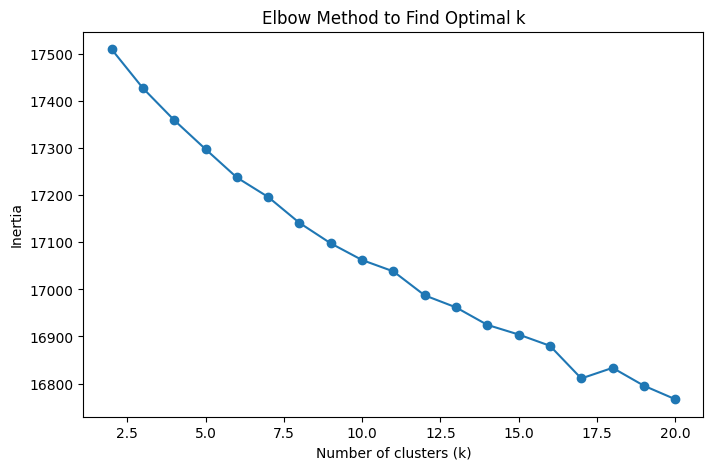

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
k_values = range(2, 21)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_tfidf)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

# Optimal k around 17 clusters based on the below chart

In [10]:
# Using optimal clusters
num_clusters = 17

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)


***Analyze and interpret the resulting clusters, examining common themes or topics within each cluster.***

In [11]:
import numpy as np

vectorizer = tfidf_vectorizer

# Get feature names (words)
terms = vectorizer.get_feature_names_out()

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print(f"Cluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # top 10 words
    print("Top terms:", ", ".join(top_terms))
    print()


Cluster 0:
Top terms: machines, please, equipment, ibm, friend, mine, lost, needed, memory, 100

Cluster 1:
Top terms: genocide, previous, article, must, got, say, two, well, think, dont

Cluster 2:
Top terms: video, card, cards, image, view, jpeg, require, gives, specific, hardware

Cluster 3:
Top terms: theory, books, lot, help, anyone, able, along, chip, related, currently

Cluster 4:
Top terms: sin, god, jesus, original, us, love, christ, faith, gods, human

Cluster 5:
Top terms: great, games, team, start, year, least, made, said, la, media

Cluster 6:
Top terms: space, nasa, would, launch, station, program, like, one, think, also

Cluster 7:
Top terms: god, jesus, bible, believe, christ, one, christian, christians, faith, people

Cluster 8:
Top terms: help, language, cards, manual, sounds, memory, fine, advance, hi, card

Cluster 9:
Top terms: would, dont, one, think, people, like, get, know, well, im

Cluster 10:
Top terms: entire, youre, letter, opinions, internet, words, see, c

Common themes within each cluster:

Cluster 0 --> Technical discussion

Cluster 1 --> General discussion

Cluster 2 --> Hardware/Video Cards

Cluster 4, 7 --> Christianity

Cluster 6 --> Space/NASA

Cluster 12 --> Encryption/Security

Cluster 15 --> Sports/Baseball

Cluster 16 --> Armenian Genocide

We have some clusters not showing a clear theme like cluster 1 & 9.
Some clusters also seem to have similar topics like cluster 4 & 7, mainly about christianity.

**4. Model Evaluation and Prediction**

***Demonstrate the applicability of the clustering model to new, unseen documents to predict their cluster assignments.***

In [12]:
# Applying the trained K-Means model to unseen data
# Selecting 10 new unseen documents

new_docs = texts_cleaned[:10]
new_X_tfidf = tfidf_vectorizer.transform(new_docs)

# Predict cluster assignments
new_clusters = kmeans.predict(new_X_tfidf)

# Display results
for idx, cluster in enumerate(new_clusters):
    print(f"Document {idx+1} assigned to Cluster {cluster}")


Document 1 assigned to Cluster 9
Document 2 assigned to Cluster 11
Document 3 assigned to Cluster 16
Document 4 assigned to Cluster 11
Document 5 assigned to Cluster 11
Document 6 assigned to Cluster 14
Document 7 assigned to Cluster 14
Document 8 assigned to Cluster 9
Document 9 assigned to Cluster 9
Document 10 assigned to Cluster 14


***Validate the effectiveness of the model by examining how well new documents fit into the established clusters using metrics such as silhouette score or cohesion and separation measures.***


In [15]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, kmeans.labels_)
print(f"Silhouette Score on training data: {score:.4f}")

# Silhouette score is almost 0, meaning clusters are greatly overlapping.
# Therefore, some on the words fit better in other clusters.
# However we did see the model identified top terms that capture meaningful topics, even if the points are close in space.

Silhouette Score on training data: -0.0202
